# Project 4, APS1070 Fall 2021
#### **Linear Regression -  13 points**
**Deadline: Nov 26, 21:00**

**Academic Integrity**

This project is individual - it is to be completed on your own. If you have questions, please post your query in the APS1070 Piazza Q&A forums (the answer might be useful to others!).

Do not share your code with others, or post your work online. Do not submit code that you have not written yourself. Students suspected of plagiarism on a project, midterm or exam will be referred to the department for formal discipline for breaches of the Student Code of Conduct.

Please fill out the following:


*   Your **name**: Zhaowei Li
*   Your **student number**: 1007911994 



## Part 1 - Getting Started [1.5 marks]

Ailerons are small hinged sections on the outboard portion of a wing used to control the roll of an airplane. In this project, we are going to design a controller to manage the ailerons of an aircraft based on supervised learning.

![Aileron](https://www.eecg.utoronto.ca/~hadizade/APS1070/p3Ar.jpg)




The following dataset contains 13750 instances, where each instance is a set of 40 features describing the airplane's status. Our goal is to use these features to predict the `Goal` column, which is a command that our controller should issue. We will make our predictions by implementing linear regression.

In [49]:
import pandas as pd
import numpy as np

df=pd.read_csv("https://raw.githubusercontent.com/aps1070-2019/datasets/master/F16L.csv" , skipinitialspace=True)

Here are the steps to complete this portion:

1. Print the dataframe.
2. Prepare your dataset as follows: **[0.5]**
  *   Using `train_test_split` from Sklearn, split the dataset into training, validation, and test sets ($70\%$ training, $15\%$ validation, and $15\%$ test). When splitting, set `random_state=1`.
  *   Standardize the data using `StandardScaler` from sklearn. 
  *   Insert the first column of all $1$s in the training, validation, and test set.
 
3. Explain the difference between epoch and iteration in the Gradient descent algorithm (SGD/mini-batch)? **[1]**

In [50]:
### YOUR CODE HERE ###
#1
df

,inputs ClimbRate,Sgz,P,Q,CurPitch,CurRoll,AbsRoll,DiffClb,DiffRollRate,DiffDiffClb,SeTime1,SeTime2,SeTime3,SeTime4,SeTime5,SeTime6,SeTime7,SeTime8,SeTime9,SeTime10,SeTime11,SeTime12,SeTime13,SeTime14,DiffSeTime1,DiffSeTime2,DiffSeTime3,DiffSeTime4,DiffSeTime5,DiffSeTime6,DiffSeTime7,DiffSeTime8,DiffSeTime9,DiffSeTime10,DiffSeTime11,DiffSeTime12,DiffSeTime13,DiffSeTime14,Alpha,Se,Goal
0,-17,-6,-0.03,0.14,0.59,-0.5,-11,-9,0.015,-0.2,0.019,0.019,0.019,0.020,0.020,0.020,0.020,0.021,0.021,0.021,0.021,0.021,0.021,0.021,0.000,0.0,-0.002,0.0,0.0,0.0,-0.002,0.0,0.000,0.0,0.000,0.0,0.000,0.0,0.6,0.021,-0.0008
1,-791,15,-0.28,-0.34,1.11,0.9,-10,27,-0.002,4.7,0.013,0.013,0.013,0.013,0.013,0.013,0.013,0.013,0.013,0.013,0.013,0.013,0.013,0.013,0.000,0.0,0.000,0.0,0.0,0.0,0.000,0.0,0.000,0.0,0.000,0.0,0.000,0.0,0.4,0.013,-0.0009
2,-46,48,-0.42,0.07,0.57,0.6,-5,-8,-0.008,0.0,0.018,0.019,0.019,0.019,0.019,0.019,0.019,0.019,0.019,0.019,0.019,0.019,0.019,0.019,-0.002,0.0,0.000,0.0,0.0,0.0,0.000,0.0,0.000,0.0,0.000,0.0,0.000,0.0,0.5,0.019,-0.0005
3,496,-5,-0.21,-0.04,0.03,-0.5,-7,6,-0.002,-0.1,0.019,0.019,0.019,0.019,0.019,0.019,0.019,0.019,0.019,0.019,0.019,0.018,0.018,0.017,-0.001,0.0,0.000,0.0,0.0,0.0,0.000,0.0,0.000,0.0,0.001,0.0,0.001,0.0,0.5,0.017,-0.0005
4,-124,16,-0.02,0.05,0.61,-0.2,-9,-3,0.000,0.0,0.018,0.018,0.018,0.018,0.018,0.018,0.018,0.018,0.018,0.018,0.018,0.018,0.018,0.018,0.000,0.0,0.000,0.0,0.0,0.0,0.000,0.0,0.000,0.0,0.000,0.0,0.000,0.0,0.5,0.018,-0.0006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13745,-53,-13,-0.07,0.02,0.58,-2.3,-15,12,0.022,-0.8,0.019,0.019,0.019,0.019,0.019,0.019,0.019,0.019,0.019,0.019,0.019,0.019,0.019,0.019,0.000,0.0,0.000,0.0,0.0,0.0,0.000,0.0,0.000,0.0,0.000,0.0,-0.001,0.0,0.5,0.019,-0.0007
13746,1,4,-0.11,-0.07,0.47,0.8,-5,8,-0.003,-0.2,0.016,0.016,0.016,0.016,0.016,0.016,0.016,0.016,0.016,0.016,0.016,0.016,0.016,0.016,0.000,0.0,0.000,0.0,0.0,0.0,0.000,0.0,0.000,0.0,0.000,0.0,0.000,0.0,0.5,0.016,-0.0004
13747,425,-14,0.40,0.07,0.41,-2.1,-16,12,0.031,-0.7,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.034,0.034,0.034,0.034,0.032,0.000,0.0,0.000,0.0,0.0,0.0,0.000,0.0,0.001,0.0,0.000,0.0,0.001,0.0,0.9,0.032,-0.0015
13748,102,-10,-0.19,0.08,1.30,0.5,-10,-3,-0.003,-0.2,0.051,0.051,0.051,0.051,0.051,0.051,0.051,0.051,0.051,0.051,0.051,0.051,0.051,0.051,0.000,0.0,0.000,0.0,0.0,0.0,0.000,0.0,0.000,0.0,0.000,0.0,0.000,0.0,1.4,0.051,-0.0015


In [51]:
#2
from sklearn.model_selection import train_test_split
y = np.array(df.iloc[:,-1]).reshape(-1,1)
X = np.array(df.iloc[:,0:40])

X_tr_va, X_test, y_tr_va, y_test = train_test_split(X, y, test_size=0.15, random_state=1)
X_train, X_valid, y_train, y_valid = train_test_split(X_tr_va, y_tr_va, test_size=15/85, random_state=1)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_train)
X_train_std = scaler.transform(X_train)
X_valid_std = scaler.transform(X_valid)
X_test_std = scaler.transform(X_test)

one_train = np.ones(X_train_std.shape[0])
one_valid = np.ones(X_valid_std.shape[0])
one_test = np.ones(X_test_std.shape[0])
X_train_1f = np.insert(X_train_std, 0, one_train, axis=1)
X_valid_1f = np.insert(X_valid_std, 0, one_valid, axis=1)
X_test_1f = np.insert(X_test_std, 0, one_test, axis=1)


3. In the gradient descent algorithm, the iteration is the number of times you adjust weights per epoch based on the batch sizes.

One epoch usually means you have adjusted you wegihts based on the whole dataset for one time. 

For mini_batch gradient descent, the iteration is (n//k + 1) times per epoch when batch size is k and the dataset size is n.

For SGD, the iteration is n times per epoch when batch size is 1 and the dataset size is n.

## Part 2 - Linear Regression Using Direct Solution [1 marks]

Implement the direct solution of the linear regression problem on the training set. **[0.5]**

**Note: You should use scipy.linalg.inv to perform the matrix inversion, as numpy.linalg.inv may cause numerical issues.**

Report the root-mean-square error (RMSE) for both the training and validation sets. **[0.5]**

You may use `mean_squared_error` from Sklearn for computing the RMSE.

In [52]:
### YOUR CODE HERE ###
from scipy import linalg
from sklearn.metrics import mean_squared_error

def rmse(yPred, y):
    return np.sqrt(mean_squared_error(yPred, y))

def Direct_sol (X_train,y_train , X_valid, y_valid):
  W = np.dot(linalg.inv(np.dot(X_train.T, X_train)), np.dot(X_train.T, y_train)) 
  y_pred_train = np.dot(X_train, W) 
  y_pred_valid = np.dot(X_valid, W)
  RMSE_train = rmse(y_pred_train, y_train)
  RMSE_valid = rmse(y_pred_valid, y_valid)
  print ("RMSE on training set: " , RMSE_train)
  print ("RMSE on validation set: " , RMSE_valid)

  return W , y_pred_train , y_pred_valid , RMSE_train , RMSE_valid

In [53]:
Result = Direct_sol( X_train_1f, y_train , X_valid_1f, y_valid)

RMSE on training set:  0.0001859883002886207
RMSE on validation set:  0.00018109568145349383


## Part 3 - Full Batch Gradient Descent [2 marks]

We will now implement a "full batch" gradient descent algorithm and record the training time for our model. Recall that the full batch gradient descent is,
 $$w_t = w_{t-1} - \alpha~g_t$$ where $\alpha$ is the learning rate and $g_t$ is your gradient, computed on the entire data. 

Here are the steps for this part:

* Implement gradient descent for linear regression using a fixed learning rate of $\alpha= 0.01$, and iterate until your model's **validation** RMSE converges. 

  We consider the gradient descent as having converged when RMSE on the validation set using gradient descent satisfies:

  $$ RMSE_\text{GD} \leq 1.001 \times RMSE_\text{Direct Solution}$$

  where $RMSE_\text{Direct Solution}$ is the RMSE on the validation set using the direct solution that you have calculated in the previous part. 

  We refer to the quantity $RMSE_\text{Direct Solution}\times 1.001$ as the convergence threshold (CT).

*  Record the training time (from the first iteration until convergence) using the `time.time()` function. Be sure to compute the gradients yourself! Take a look at the code provided in the tutorial. **[0.5]**

* Plot the training RMSE and the validation RMSE vs. epoch on the same figure.  **[0.5]**

* Comment on overfitting/underfitting by observing the training and validation RMSE **[1]**

**Hint**: Initialize your weights with small random numbers (<$0.001$)

--- Total Training Time: 2.9458749294281006 (s) ---


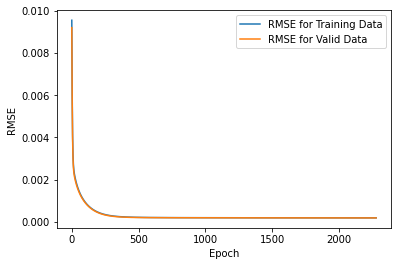

In [54]:
import time
import matplotlib.pyplot as plt

start_time = time.time() ## Records current time

## GD Script -- Sample code in tutorial! ##
w_train = 0.001*np.random.rand(1,(X.shape[1]+1))

CT = 1.001*Result[4]
lr = 0.01
RMSE_valid = 1
rmse_valid_lst = []
rmse_train_lst = []


while RMSE_valid > CT: 
  y_pred_train = np.dot(X_train_1f,w_train.T).reshape (-1,1)
  y_pred_valid = np.dot(X_valid_1f,w_train.T).reshape (-1,1)
  RMSE_valid = rmse(y_pred_valid, y_valid)
  
  rmse_train_lst.append(rmse(y_pred_train,y_train))
  rmse_valid_lst.append(RMSE_valid)

  gradient_train = (1/len(y_pred_train) * np.dot(X_train_1f.T, y_pred_train-y_train)).reshape(1,-1)

  w_train = w_train - lr * gradient_train

print("--- Total Training Time: %s (s) ---" % (time.time() - start_time))

plt.plot(rmse_train_lst, label = "RMSE for Training Data")
plt.plot(rmse_valid_lst, label = "RMSE for Valid Data")
plt.xlabel("Epoch")
plt.ylabel("RMSE")
plt.legend()
plt.show()


Baes on the graph, you can see that RMSE for training data and valid data almost have the same shape and both decline as the epochs are increasing.

Hence, there is no overfitting or underfitting problem.

## Part 4 - Mini-batch and Stochastic Gradient Descent [4 marks]

Write a function that performs mini-batch gradient descent until the convergence threshold (CT) is reached. **[1]**

The inputs of that function are: 
  * Input data (training/validation), Batch size, Learning Rate, Convergence Threshold (CT)

Your function will return the following arrays: 
 * The final weights after training.
 * The training RMSE at each epoch.
 * The validation RMSE at each epoch.
 * An array that has the elapsed time from the start of the training process to the end of each epoch (e.g., if each epoch takes exactly 2 seconds, the array would look like: [2 4 6 8 ...]).

Notes: 
* For certain batch sizes, GD might not converge to a solution. For that reason, you need to check the RMSE of the validation/training set at each epoch, and if it's getting larger and larger, you should stop the training for that case (the design is up to you!).
* CT will help you to know when your model is converged. 
* **Important: after each epoch, you need to shuffle the entire training set.** This ensures that new mini-batches are selected for every epoch. Hint: use `np.random.permutation`. 

Let's now use the function to investigate the effect of batch size on convergence. When the batch size is 1, we call that stochastic gradient descent. When the batch size equals the # of training data, it is full-batch (i.e., all data points are used at every iteration). Anywhere in between is mini-batch (we use some of the data).
  * Sweep different values for the mini-batch size (at least 5 values), each time using a learning rate of $\alpha= 0.01$. **Hint: Try batch sizes that are powers of two (e.g., 2,4,8,16,32,64,128...).** These batch sizes fit better on the hardware and may achieve higher performance.  **[0.5]**

Provide the following $3$ plots:
  1.  Plot training and validation RMSE vs. **epoch** for all the **converging** batch sizes (some batch sizes might not converge) in a figure. The X-axis is Epoch # and the Y-axis is RMSE. **[0.5]**
  2. Plot training and validation RMSE vs. **time** for all the **converging** batch sizes in a figure. The X-axis is Time, and the Y-axis is RMSE. **[0.5]**
  3. Plot Total training time (y-axis) vs. Batch size (x-axis). **[0.5]**

Describe your findings, including the main takeaways from each of your plots. **[1]**

In [55]:
### YOUR CODE HERE ###
def mini_batch_epoch(X_train_1f, y_train, w_train, batch_size): #part of the main function
  beg = 0
  y_pred_train = np.ones((X_train_1f.shape[0],1))
  for i in range((X_train_1f.shape[0]/batch_size) if (X_train_1f.shape[0]/batch_size).is_integer() else (int(X_train_1f.shape[0]/batch_size) + 1) ):
  
    if (X_train_1f.shape[0]/batch_size).is_integer():    
      y_pred_train[beg:(beg+batch_size)] = np.dot(X_train_1f[beg:(beg+batch_size)],w_train.T).reshape (-1,1)
      gradient_train = (1/len(y_pred_train[beg:(beg+batch_size)]) * np.dot(X_train_1f[beg:(beg+batch_size)].T, y_pred_train[beg:(beg+batch_size)]-y_train[beg:(beg+batch_size)])).reshape(1,-1)
      w_train -= lr * gradient_train
      beg += batch_size
    else:
      if i == (int(X_train_1f.shape[0]/batch_size)+1):
        y_pred_train[((i-1)*batch_size):] = np.dot(X_train_1f[((i-1)*batch_size):],w_train.T).reshape (-1,1)
        gradient_train = (1/len(y_pred_train[((i-1)*batch_size):]) * np.dot(X_train_1f[((i-1)*batch_size):].T, y_pred_train[((i-1)*batch_size):]-y_train[((i-1)*batch_size):])).reshape(1,-1)
        w_train -= lr * gradient_train
      else:
        y_pred_train[beg:(beg+batch_size)] = np.dot(X_train_1f[beg:(beg+batch_size)],w_train.T).reshape (-1,1)
        gradient_train = (1/len(y_pred_train[beg:(beg+batch_size)]) * np.dot(X_train_1f[beg:(beg+batch_size)].T, y_pred_train[beg:(beg+batch_size)]-y_train[beg:(beg+batch_size)])).reshape(1,-1)
        w_train -= lr * gradient_train
        beg += batch_size
  
  return y_pred_train, w_train


def mini_batch_gd(X_train_1f, X_valid_1f, y_train, y_valid, batch_size, lr, CT): #main function
  time_lst = []

  RMSE_valid = 1
  rmse_valid_lst = []
  rmse_train_lst = []

  w_train = 0.001*np.random.rand(1,(X_train_1f.shape[1]))

  larger_case_train = 0
  larger_case_valid = 0

  while RMSE_valid > CT: 
    start_time = time.time() ## Records current time

    y_pred_train, w_train = mini_batch_epoch(X_train_1f, y_train, w_train, batch_size)

    time_lst.append(time.time() - start_time)

    y_pred_valid = np.dot(X_valid_1f,w_train.T).reshape (-1,1)
    RMSE_valid = rmse(y_pred_valid, y_valid)

    rmse_train_lst.append(rmse(y_pred_train,y_train))
    rmse_valid_lst.append(RMSE_valid)

    
    if len(rmse_train_lst) > 1:
      if rmse_train_lst[(len(rmse_train_lst)-1)] > rmse_train_lst[(len(rmse_train_lst)-2)]:
        larger_case_train += 1 

    if len(rmse_valid_lst) > 1:
      if rmse_valid_lst[(len(rmse_valid_lst)-1)] > rmse_valid_lst[(len(rmse_valid_lst)-2)]:
        larger_case_valid += 1 
    
    if larger_case_train == 100:
      break

    if larger_case_valid == 100:
      break
    
    train_shuffler = np.random.permutation(len(X_train_1f))
    valid_shuffler = np.random.permutation(len(X_valid_1f))

    X_train_1f = X_train_1f[train_shuffler]
    X_valid_1f = X_valid_1f[valid_shuffler]
    y_train = y_train[train_shuffler]
    y_valid = y_valid[valid_shuffler]


  return w_train, rmse_train_lst, rmse_valid_lst, time_lst

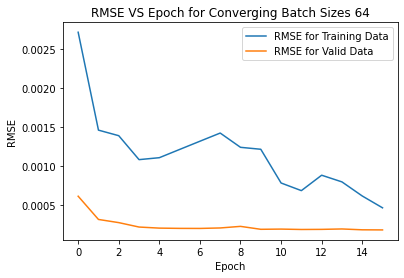

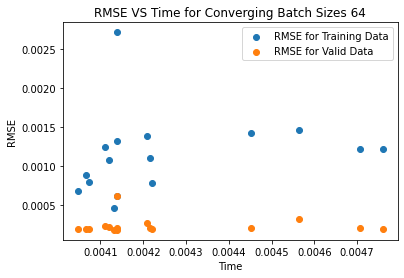

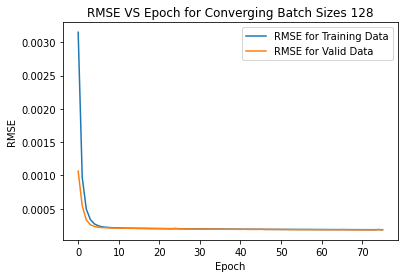

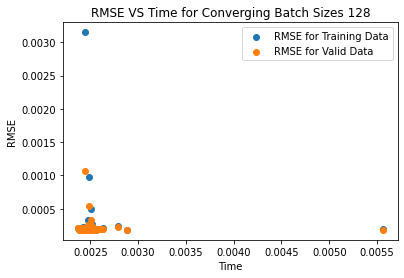

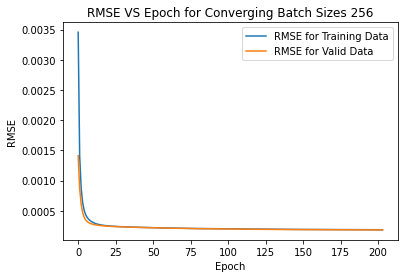

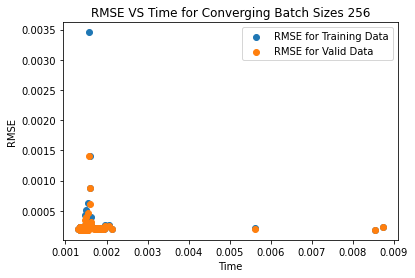

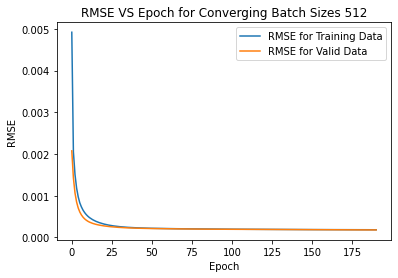

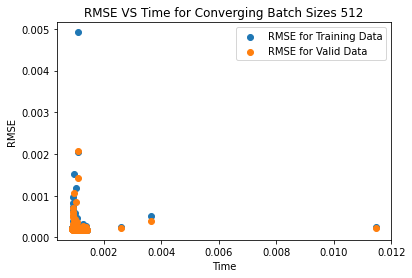

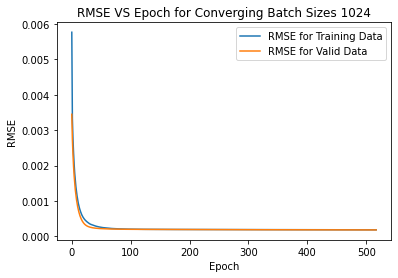

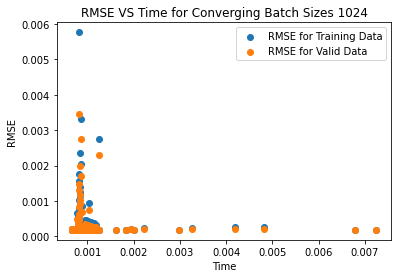

No handles with labels found to put in legend.


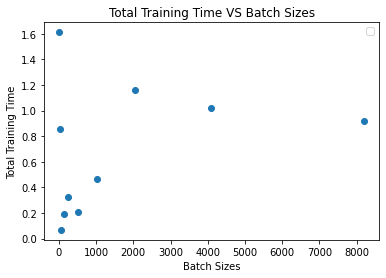

In [56]:
total_time_lst = []
cover_rmse_train_lst = []
cover_rmse_valid_lst = []
cover_batch_lst = []
cover_time_lst = []

batch_size_ex = [16,32,64,128,256,512,1024,2048,4096,8192]

for i in batch_size_ex:
  w_train, rmse_train_lst, rmse_valid_lst, time_lst = mini_batch_gd(X_train_1f, X_valid_1f, y_train, y_valid, i, lr, CT)
  
  if rmse_valid_lst[-1] <= CT:
    cover_rmse_train_lst.append(rmse_train_lst)
    cover_rmse_valid_lst.append(rmse_valid_lst)
    cover_batch_lst.append(i)
    cover_time_lst.append(time_lst)

  total_time_lst.append(sum(time_lst))

for i in range(len(cover_batch_lst)):
  plt.plot(cover_rmse_train_lst[i], label = "RMSE for Training Data")
  plt.plot(cover_rmse_valid_lst[i], label = "RMSE for Valid Data")
  plt.xlabel("Epoch")
  plt.ylabel("RMSE")
  plt.title("RMSE VS Epoch for Converging Batch Sizes {}".format(cover_batch_lst[i]))
  plt.legend()
  plt.show()
  plt.close()

  plt.scatter(cover_time_lst[i], cover_rmse_train_lst[i], label = "RMSE for Training Data")
  plt.scatter(cover_time_lst[i], cover_rmse_valid_lst[i], label = "RMSE for Valid Data")
  plt.xlabel("Time")
  plt.ylabel("RMSE")
  plt.title("RMSE VS Time for Converging Batch Sizes {}".format(cover_batch_lst[i]))
  plt.legend()
  plt.show()
  plt.close()



print("\n", "\n")



plt.scatter(batch_size_ex, total_time_lst)
plt.xlabel("Batch Sizes")
plt.ylabel("Total Training Time")
plt.title("Total Training Time VS Batch Sizes")
plt.legend()
plt.show()


As the batch size is growing, there are two main find outs stably and continuingly happen.

The required number of epochs for RMSE to have huge reduction is continuingly increasing as the batch size increases.

Most of the training time for each epoch is continuingly decreasing as the batch size increases.

It is easier to have underfittng porbelm on small batch size, such as batch size 64.

It is easier to have non-convergence of RMSE on very small or large batch size, such as batch size 16, 32, 2048, 4096, 8192.

The batch size that do have convergnece of RMSE of validation data are batch sizes 64, 128, 512, 1024.

The total training time each batch size appears to have a sharp decrease and then a gradual incease as the batch size grows. 



## Part 5 - Introducing Momentum [3.5 marks]

Momentum is a popular technique that helps the gradient descent algorithm to converge faster. Simply, it behaves like a moving average of gradients. First, take a look at [here](https://towardsdatascience.com/stochastic-gradient-descent-with-momentum-a84097641a5d) to get familiar with the concept.

To summarize, If the weight update formula in the time-step $t$ is $w_t = w_{t-1} - \alpha~g_t$, the $g_t$ using momentum could be computed as $g_t = \beta~g_{t-1} + (1-\beta) \frac{{\partial J}}{\partial w}$. Where $\beta$ is the momentum coefficient, between [0, 1]. 

Weight updates ($g_t$) with momentum are not only computed based on the derivative of the loss function but also is a function of previous weight updates.

If you put $\beta=0$ in the $g_t$ equation, it would be the original gradient descent method. 

* Add momentum to your training function. **[1]**
* Train a linear model with a specific batch size and various values of momentums. 
  *  Plot your training and validation RMSE for each epoch. **[1]**
  *  With some plots (or tables) show how momentum affects the training time.  **[1]**
  * Summarize your experiments and comment on the effect of momentum. **[0.5]**

In [57]:
### YOUR CODE HERE ###
def mini_batch_epoch_momentum(X_train_1f, y_train, w_train, batch_size, beta): #part of the main function
  beg = 0
  y_pred_train = np.ones((X_train_1f.shape[0],1))
  pre_gradient_train = np.zeros((1,w_train.shape[1]))
  for i in range((X_train_1f.shape[0]/batch_size) if (X_train_1f.shape[0]/batch_size).is_integer() else (int(X_train_1f.shape[0]/batch_size) + 1) ):
  
    if (X_train_1f.shape[0]/batch_size).is_integer():    
      y_pred_train[beg:(beg+batch_size)] = np.dot(X_train_1f[beg:(beg+batch_size)],w_train.T).reshape (-1,1)
      gradient_train = (1/len(y_pred_train[beg:(beg+batch_size)]) * np.dot(X_train_1f[beg:(beg+batch_size)].T, y_pred_train[beg:(beg+batch_size)]-y_train[beg:(beg+batch_size)])).reshape(1,-1)
      if np.all((pre_gradient_train == 0)):
        w_train -= lr * gradient_train
        pre_gradient_train = gradient_train
      else:
        w_train = beta * pre_gradient_train + (1 - beta) * lr * gradient_train

      beg += batch_size
    else:
      if i == (int(X_train_1f.shape[0]/batch_size)+1):
        y_pred_train[((i-1)*batch_size):] = np.dot(X_train_1f[((i-1)*batch_size):],w_train.T).reshape (-1,1)
        gradient_train = (1/len(y_pred_train[((i-1)*batch_size):]) * np.dot(X_train_1f[((i-1)*batch_size):].T, y_pred_train[((i-1)*batch_size):]-y_train[((i-1)*batch_size):])).reshape(1,-1)
        w_train = beta * pre_gradient_train + (1 - beta) * lr * gradient_train
      else:
        y_pred_train[beg:(beg+batch_size)] = np.dot(X_train_1f[beg:(beg+batch_size)],w_train.T).reshape (-1,1)
        gradient_train = (1/len(y_pred_train[beg:(beg+batch_size)]) * np.dot(X_train_1f[beg:(beg+batch_size)].T, y_pred_train[beg:(beg+batch_size)]-y_train[beg:(beg+batch_size)])).reshape(1,-1)
        if np.all((pre_gradient_train == 0)):
          w_train -= lr * gradient_train
          pre_gradient_train = gradient_train
        else:
          w_train = beta * pre_gradient_train + (1 - beta) * lr * gradient_train
        
        beg += batch_size
  
  return y_pred_train, w_train


def mini_batch_gd_momentum(X_train_1f, X_valid_1f, y_train, y_valid, batch_size, lr, CT, beta): #main function
  time_lst = []

  RMSE_valid = 1
  rmse_valid_lst = []
  rmse_train_lst = []

  w_train = 0.001*np.random.rand(1,(X_train_1f.shape[1]))

  larger_case_train = 0
  larger_case_valid = 0

  while RMSE_valid > CT: 
    start_time = time.time() ## Records current time

    y_pred_train, w_train = mini_batch_epoch_momentum(X_train_1f, y_train, w_train, batch_size, beta)

    time_lst.append(time.time() - start_time)

    y_pred_valid = np.dot(X_valid_1f,w_train.T).reshape (-1,1)
    RMSE_valid = rmse(y_pred_valid, y_valid)

    rmse_train_lst.append(rmse(y_pred_train,y_train))
    rmse_valid_lst.append(RMSE_valid)

    
    if len(rmse_train_lst) > 1:
      if rmse_train_lst[(len(rmse_train_lst)-1)] > rmse_train_lst[(len(rmse_train_lst)-2)]:
        larger_case_train += 1 

    if len(rmse_valid_lst) > 1:
      if rmse_valid_lst[(len(rmse_valid_lst)-1)] > rmse_valid_lst[(len(rmse_valid_lst)-2)]:
        larger_case_valid += 1 
    
    if larger_case_train == 100:
      print("The RMSE for training dataset is getting larger for 100 times.")
      break

    if larger_case_valid == 100:
      print("The RMSE for validation dataset is getting larger for 100 times.")
      break
    
    train_shuffler = np.random.permutation(len(X_train_1f))
    valid_shuffler = np.random.permutation(len(X_valid_1f))

    X_train_1f = X_train_1f[train_shuffler]
    X_valid_1f = X_valid_1f[valid_shuffler]
    y_train = y_train[train_shuffler]
    y_valid = y_valid[valid_shuffler]


  return w_train, rmse_train_lst, rmse_valid_lst, time_lst

The RMSE for validation dataset is getting larger for 100 times.


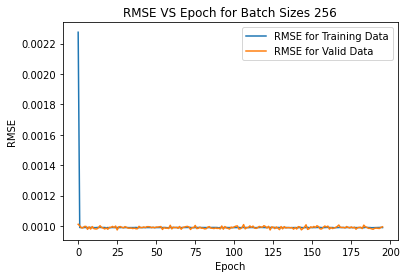

The momentum coefficient is 0.0

 

The RMSE for validation dataset is getting larger for 100 times.


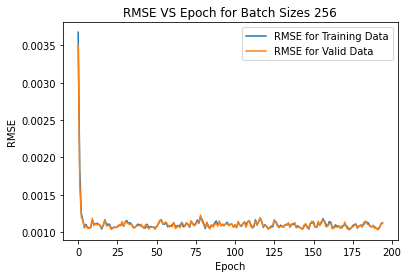

The momentum coefficient is 0.02

 

The RMSE for validation dataset is getting larger for 100 times.


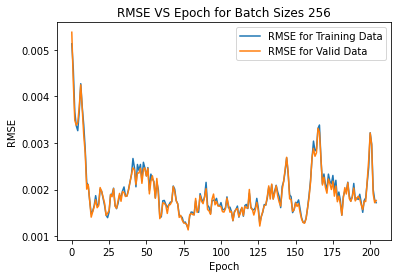

The momentum coefficient is 0.04

 

The RMSE for validation dataset is getting larger for 100 times.


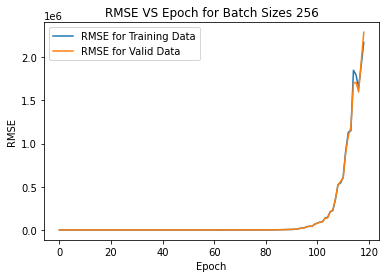

The momentum coefficient is 0.06

 

The RMSE for training dataset is getting larger for 100 times.


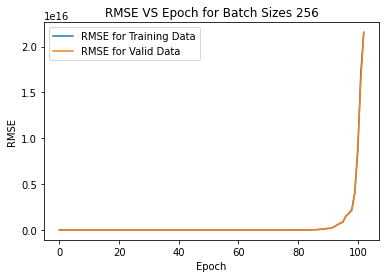

The momentum coefficient is 0.08

 

The RMSE for training dataset is getting larger for 100 times.


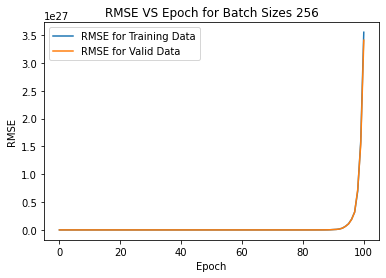

The momentum coefficient is 0.1

 

The RMSE for training dataset is getting larger for 100 times.


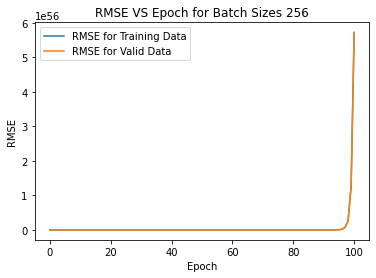

The momentum coefficient is 0.2

 

The RMSE for training dataset is getting larger for 100 times.


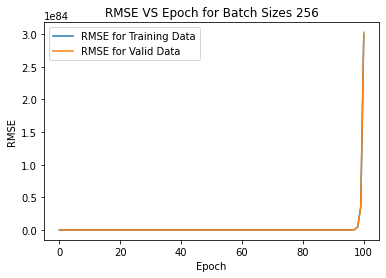

The momentum coefficient is 0.4

 

The RMSE for training dataset is getting larger for 100 times.


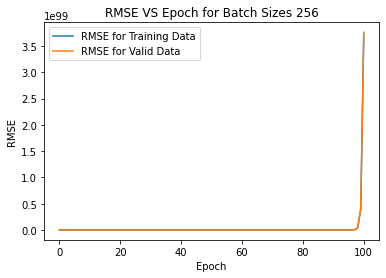

The momentum coefficient is 0.6000000000000001

 

The RMSE for training dataset is getting larger for 100 times.


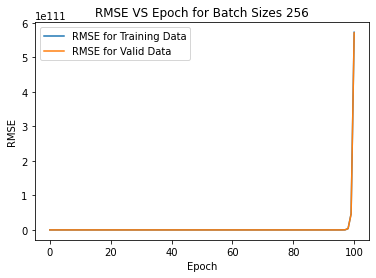

The momentum coefficient is 0.8

 

The RMSE for training dataset is getting larger for 100 times.


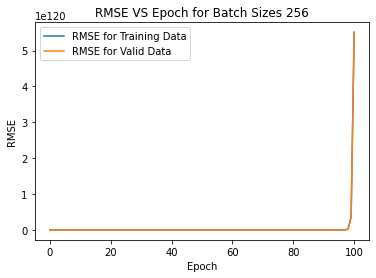

No handles with labels found to put in legend.


The momentum coefficient is 1.0

 



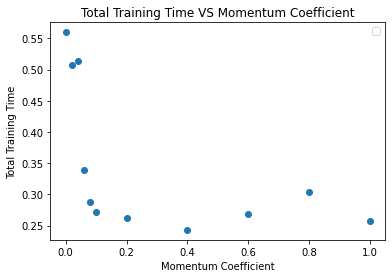

In [58]:
batch_size_ex = 256
momentum1 = np.arange(0,0.12,0.02)
momentum2 = np.arange(0.2,1.2,0.2)
momentum = np.hstack((momentum1,momentum2))

total_time_lst = []

for i in momentum:
  w_train, rmse_train_lst, rmse_valid_lst, time_lst = mini_batch_gd_momentum(X_train_1f, X_valid_1f, y_train, y_valid, batch_size_ex, lr, CT, i)
  
  plt.plot(rmse_train_lst, label = "RMSE for Training Data")
  plt.plot(rmse_valid_lst, label = "RMSE for Valid Data")
  plt.xlabel("Epoch")
  plt.ylabel("RMSE")
  plt.title("RMSE VS Epoch for Batch Sizes {}".format(batch_size_ex))
  plt.legend()
  plt.show()
  plt.close()

  total_time_lst.append(sum(time_lst))
  
  print("The momentum coefficient is {}".format(i))
  print("\n", "\n")

plt.scatter(momentum, total_time_lst)
plt.xlabel("Momentum Coefficient")
plt.ylabel("Total Training Time")
plt.title("Total Training Time VS Momentum Coefficient")
plt.legend()
plt.show()

I pick a batch size 256, which happens to have converging RMSE from part 4.

However, none of the RMSE has converged here for each momentum I choose here. 

According to all the graphs above, small momentum coefficents have higher chance to create patterns like convergence of RMSE.

And something special about those RMSE with small momentum coefficients is that, they all appear to be volitle and noisy.  

The total training time each momentum coefficient appears to have a sharp decrease and then keep stable as the momentum coefficient grows

## Part 6 - Finalizing a model [1 marks]
Based on your findings from the previous parts, pick a model (or combination of model settings) that you think would work best for our dataset and evaluate it on the test set. 

Briefly describe your model selections/settings. **[0.5]** 

Summarize the performance of your model for the task of managing ailerons of an aircraft. **[0.5]** 

In [59]:
### YOUR CODE HERE ###
w_train, rmse_train_lst, rmse_valid_lst, time_lst = mini_batch_gd(X_train_1f, X_valid_1f, y_train, y_valid, 128, lr, CT)

num_epoch = len(rmse_valid_lst)
total_time = round(sum(time_lst),2)

y_pred_test = np.dot(X_test_1f,w_train.T).reshape (-1,1)
RMSE_test = rmse(y_pred_test, y_test)

print(
  """
  Among all the models from previous parts, batch size of 128 has converging RMSE for validation data without problems of overfitting or underfitting.
  And also, it takes the least amount total trainnig time on average of different tries.

  Hence, The batch size is 128.
  The number of epochs is {}.
  
  Total training time for gradient descent is {}s.
  RMSE for training data is {}.
  RMSE for validation data is {}.
  RMSE for test data is {}.
  """.format(num_epoch,total_time,rmse_train_lst[-1],rmse_valid_lst[-1],RMSE_test)
)




  Among all the models from previous parts, batch size of 128 has converging RMSE for validation data without problems of overfitting or underfitting.
  And also, it takes the least amount total trainnig time on average of different tries.

  Hence, The batch size is 128.
  The number of epochs is 87.
  
  Total training time for gradient descent is 0.21s.
  RMSE for training data is 0.0001851868162938135.
  RMSE for validation data is 0.0001809179628213738.
  RMSE for test data is 0.00017505110130336868.
  
